In [398]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# EDA

In [367]:
data=pd.read_csv("Bengaluru_House_Data.csv")

In [368]:
print(data.head(5))
print("\n")
print("Shape:",data.shape)
print("\n")
print("Columns:",data.columns)

              area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00  


Shape: (13320, 9)


Columns: Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')


In [369]:
data.drop(['area_type','society','availability','balcony'],axis='columns',inplace=True)
data.shape



(13320, 5)

# Dropping nullvalues from dataset


In [370]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB
None


In [371]:
print(data.isnull().sum())

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64


In [372]:
data.dropna(inplace=True)

In [373]:
print(data.isnull().sum())

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64



# Feature Engineering


# Adding New Column bhk extracting just numbers from size

In [374]:
data['bhk'] = data['size'].apply(lambda x: int(x.split(' ')[0]))


In [375]:
data.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [376]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [377]:
df1 = data.copy()
df1.total_sqft = df1.total_sqft.apply(convert_sqft_to_num)
df1= df1[df1.total_sqft.notnull()]


In [378]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


# Adding new feature price_per_sqrfeet from price and total_sqft

In [379]:
df2=df1.copy()
df2['price_per_sqrfeet']=(df2['price']*100000)/df2['total_sqft']
df2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqrfeet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


# Removing space from loaction column and find number of values ,if the values or datapoint is leass than 10 for specific location we tag it us "others",so while doing one hot coding in next step we can reduce the size

In [380]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df2['location'].value_counts(ascending=False)
location_stats


location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [381]:
len(location_stats)


1287

In [382]:
location_stats_less_than_10=location_stats[location_stats<=10]

df2.location = df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [383]:
df2.location.value_counts()

location
other              2872
Whitefield          533
Sarjapur  Road      392
Electronic City     304
Kanakpura Road      264
                   ... 
Doddaballapur        11
Tindlu               11
Marsur               11
HAL 2nd Stage        11
Kodigehalli          11
Name: count, Length: 241, dtype: int64

In [384]:
len(df2.location.unique())

241

In [388]:
df3 = df2[~(df2.total_sqft/df2.bhk<300)]
df3



,location,size,total_sqft,bath,price,bhk,price_per_sqrfeet
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [389]:
df3.price_per_sqrfeet.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqrfeet, dtype: float64

In [393]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrfeet)
        st = np.std(subdf.price_per_sqrfeet)
        reduced_df = subdf[(subdf.price_per_sqrfeet>(m-st)) & (subdf.price_per_sqrfeet<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4=remove_pps_outliers(df3)

In [395]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqrfeet
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...,...
10237,other,2 BHK,1353.0,2.0,110.00,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
10239,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
10240,other,2 BHK,1075.0,2.0,48.00,2,4465.116279




# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like


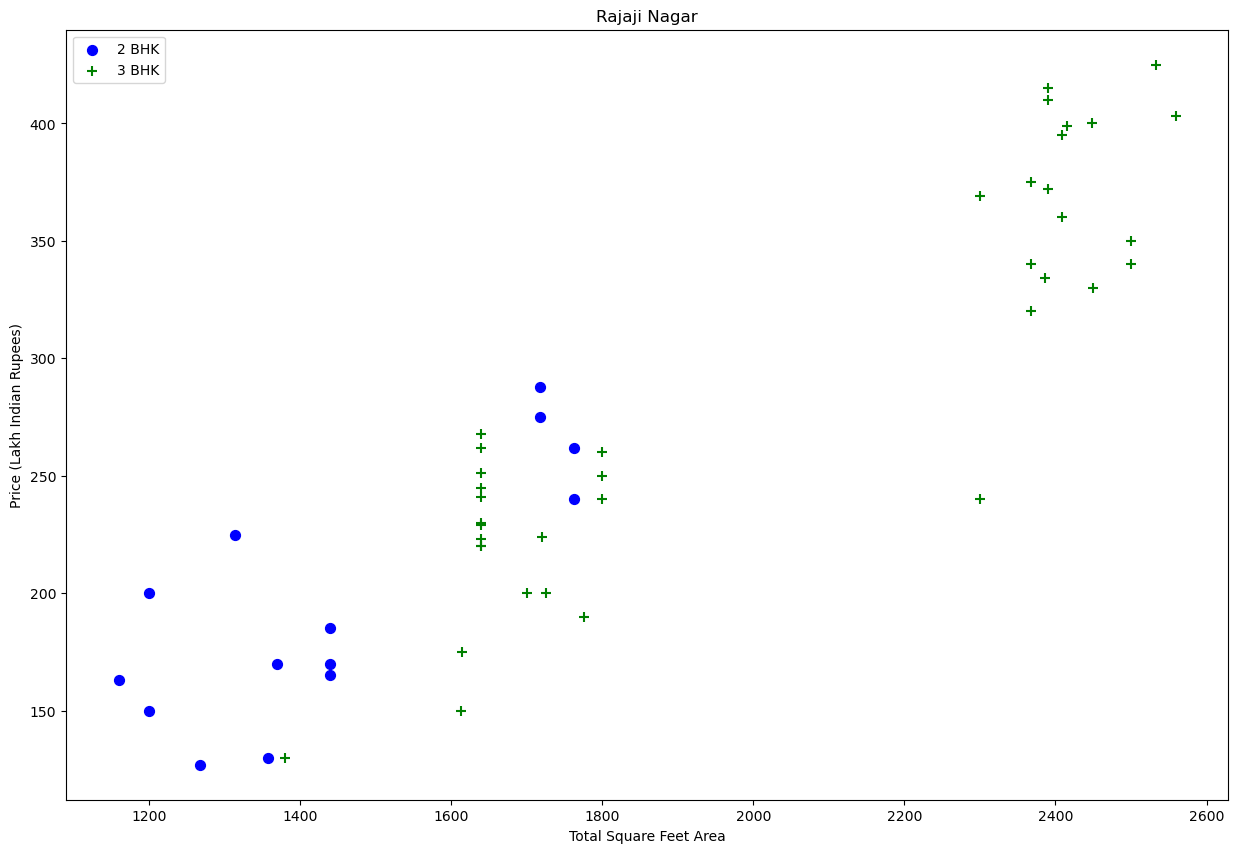

In [399]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")



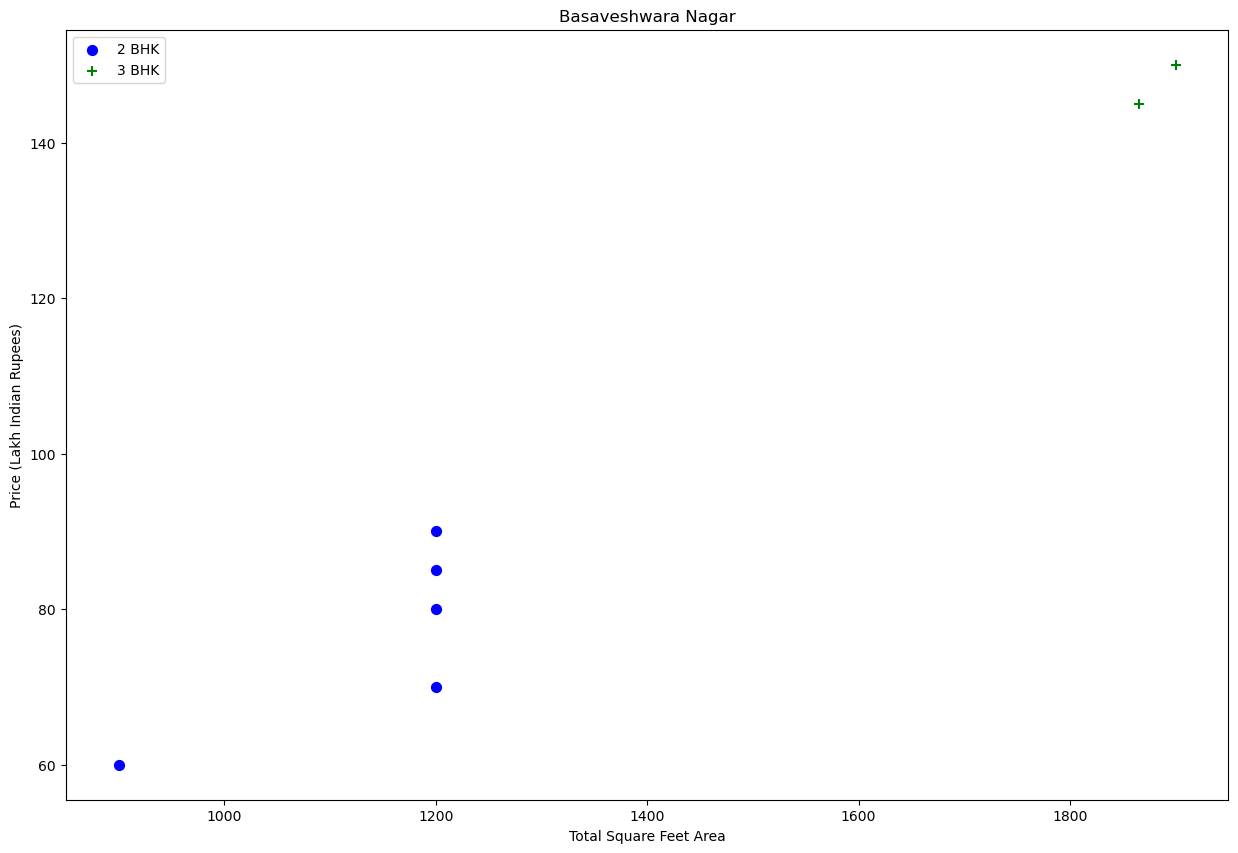

In [401]:
plot_scatter_chart(df4,"Basaveshwara Nagar")


In [403]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqrfeet),
                'std': np.std(bhk_df.price_per_sqrfeet),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqrfeet<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)

df5.shape



(7317, 7)

Text(0, 0.5, 'Count')

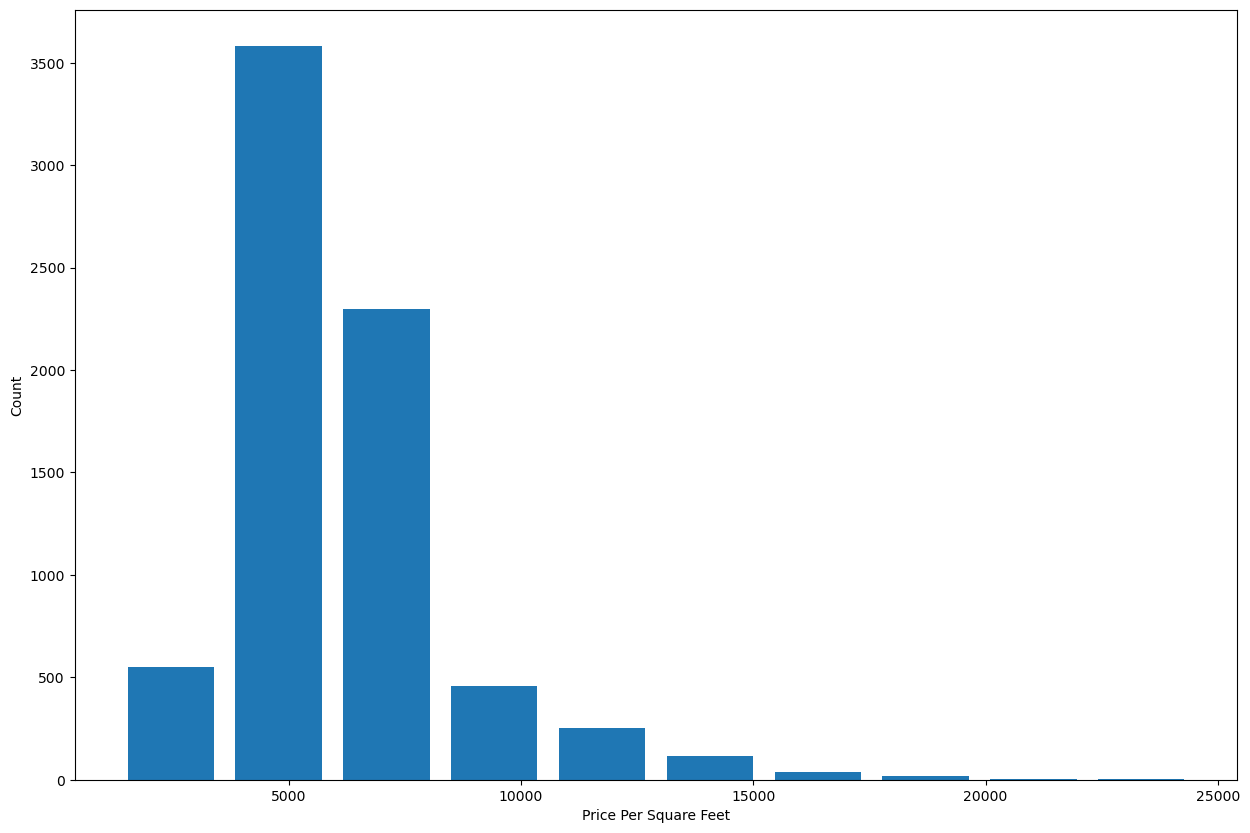

In [405]:
plt.hist(df5.price_per_sqrfeet,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Removing Bathrooms which is more than the no.of bedroom,consider fora each bedrro there is a bathroom +one guest bath room,so we can remove if the bathroom count>no. of bedroom+1

In [406]:
print(df5[(df5.bath>df5.bhk+1)])

                   location       size  total_sqft  bath  price  bhk  \
36     2nd Stage Nagarbhavi  6 Bedroom      3000.0   8.0  451.0    6   
37     2nd Stage Nagarbhavi  6 Bedroom      2400.0   8.0  450.0    6   
530                 Arekere      4 BHK      2710.0   6.0  142.0    4   
580           BTM 2nd Stage  3 Bedroom      1260.0   5.0  185.0    3   
813            Bannerghatta      4 BHK      3012.0   6.0  250.0    4   
...                     ...        ...         ...   ...    ...  ...   
9914                  other      4 BHK      6652.0   6.0  510.0    4   
10035                 other      2 BHK       600.0   4.0   70.0    2   
10090                 other  3 Bedroom      5656.0   5.0  499.0    3   
10203                 other      4 BHK      6652.0   6.0  660.0    4   
10210                 other  4 Bedroom      6688.0   6.0  700.0    4   

       price_per_sqrfeet  
36          15033.333333  
37          18750.000000  
530          5239.852399  
580         14682.539683  


In [407]:
df6=df5[(df5.bath<=df5.bhk+1)]

In [408]:
df6.shape

(7239, 7)


# Use One Hot Encoding For Location


In [409]:
dummies=pd.get_dummies(df6.location).astype(int)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [410]:
df7=pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')

In [411]:
df8=df7.drop('location',axis=1)

In [416]:
df8=df8.drop('size',axis=1)

# Model Building

# Setting Dependent and Independent Features

In [417]:
X=df8.drop('price',axis=1)
y=df8['price']

# Spliting Training and Testing Data

In [418]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [419]:
regression=LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.8650316132793873

In [420]:
y_pred = regression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Squared Error: 1254.018151099724
R-squared: 0.8650316132793873


In [421]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)



array([0.91602614, 0.9529625 , 0.94310312, 0.9020262 , 0.94775676])

In [422]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)



/home/data/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/data/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/data/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/home/data/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/home/data/anac

,model,best_score,best_params
0,linear_regression,0.932375,{'fit_intercept': True}
1,lasso,0.927368,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.909688,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
